## Primera implementación del método de involuciones para el mapeo no twist cuadrático.

In [1]:
using PyCall
using LaTeXStrings
@pyimport numpy as np
using SymPy
using Roots
using Plots

┌ Warning: `@pyimport foo` is deprecated in favor of `foo = pyimport("foo")`.
│   caller = _pywrap_pyimport(::PyObject) at PyCall.jl:410
└ @ PyCall /home/eve/.julia/packages/PyCall/BcTLp/src/PyCall.jl:410


In [2]:
# por si quiero revisar
# x = Sym("x")
# y = Sym("y")
# a = Sym("a")
# b = Sym("b");


Defino el mapeo usando funciones.

In [2]:
function MapeoX(x,y,a,b)
    vx = x+a*(1-(y-b*sin(2*pi*x))^2)
    return vx
end

MapeoX (generic function with 1 method)

In [3]:
function MapeoY(x,y,a,b)
    vy = y-b*sin(2*pi*x)
    return vy
end

MapeoY (generic function with 1 method)

💠 Defino un nuevo mapeo pero con parametros espcificos, usando la condicion del primer conjunto invariante
$$I_{1}=\{x | x =\frac{a}{2}(1-y^{2})\}$$

In [4]:
# por el momento a y b son variables globales
a = 0.1
b = 0.1
MapeoAX(y) = MapeoX((a/2)*(1-y^2),y,a,b) 
MapeoAY(y) = MapeoY((a/2)*(1-y^2),y,a,b)

MapeoAY (generic function with 1 method)

itero el mapeo anterior 2 veces para buscar puntos de periodo 2.

In [5]:
MapeoA2X(y) = MapeoAX(MapeoAX(y))
MapeoA2Y(y) = MapeoAY(MapeoAY(y))

MapeoA2Y (generic function with 1 method)

Usando la funcion de multiples ceros busco los puntos de periodo dos

In [6]:
cerosYAa = find_zeros(MapeoA2X,-4.0,4.0)

2-element Array{Float64,1}:
 -2.8229230553285802
  2.70761828365477

In [7]:
cerosYAb = find_zeros(MapeoA2Y,-4.0,4.0)

1-element Array{Float64,1}:
 0.06166129595317498

Calculamos los ceros en x usando la condicion.

In [8]:
function x_puntoF(y,a)
    x = mod((a/2)*(1-y^2),1)
    #x = (a/2)*(1-y^2)
    return x
end


x_puntoF (generic function with 1 method)

In [9]:
cerosXAa = [x_puntoF(cerosYAa[i],a) for i in 1:length(cerosYAa)]
cerosXAb = [x_puntoF(cerosYAb[i],a) for i in 1:length(cerosYAb)]

1-element Array{Float64,1}:
 0.04980989422906875

In [10]:
listaY = [y for y in -4.0:0.1:4.0]
listaX = [mod((0.1/2)*(1-y^2),1) for y in listaY]
plot(listaX, listaY, label = "")
scatter!([cerosXAa,cerosXAb],[cerosYAa, cerosYAb], label = "", fmt = :png)


ErrorException: could not load library "libGR.so"
libGR.so: cannot open shared object file: No such file or directory

Ahora usando el segundo conjunto invariante
$$I_{0}= \{(x,y)| x=0\}$$

In [16]:
MapeoBX(y) = MapeoX(0.0,y,a,b)
MapeoBY(y) = MapeoY(0.0,y,a,b)

MapeoBY (generic function with 1 method)

In [17]:
MapeoB2X(y) = MapeoBX(MapeoBX(y))
MapeoB2Y(y) = MapeoBY(MapeoBY(y))

MapeoB2Y (generic function with 1 method)

In [18]:
cerosYBa = find_zeros(MapeoB2X,-4.0,4.0)
cerosYBb = find_zeros(MapeoB2Y,-4.0,4.0)

1-element Array{Float64,1}:
 0.0

In [19]:
cerosXBa = zeros(length(cerosYBa))
cerosXBb = zeros(length(cerosYBb))

1-element Array{Float64,1}:
 0.0

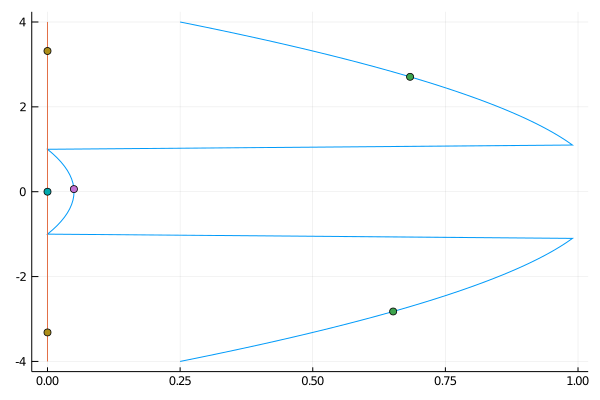

In [20]:
listaYB = [y for y in -4.0:0.1:4.0]
listaXB = zeros(length(listaYB))
plot(listaX, listaY, label = "")
plot!(listaXB, listaYB, label = "")
scatter!([cerosXAa,cerosXAb],[cerosYAa, cerosYAb], label = "")
scatter!([cerosXBa,cerosXBb],[cerosYBa, cerosYBb], label = "")

### ⭐ Siguiente iteración.

In [21]:
MapeoA3X(y) = MapeoAX(MapeoAX(MapeoAX(y)))
MapeoA3Y(y) = MapeoAY(MapeoAY(MapeoAY(y)))

MapeoA3Y (generic function with 1 method)

In [22]:
ceros3YAa = find_zeros(MapeoA3X,-4.0,4.0)
ceros3YAb = find_zeros(MapeoA3Y,-4.0,4.0)

1-element Array{Float64,1}:
 0.09230829712559699

In [23]:
ceros3XAa = [x_puntoF(ceros3YAa[i],a) for i in 1:length(ceros3YAa)]
ceros3XAb = [x_puntoF(ceros3YAb[i],a) for i in 1:length(ceros3YAb)]

1-element Array{Float64,1}:
 0.049573958914088626

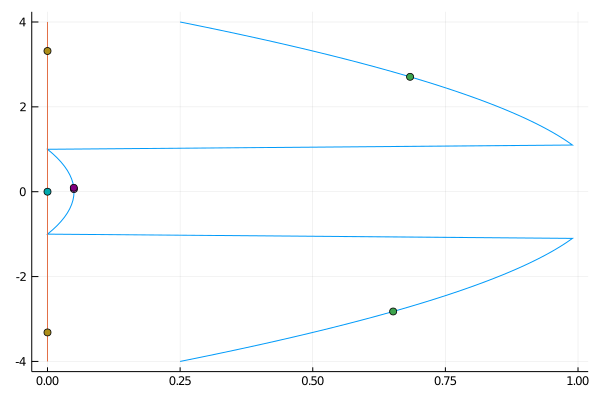

In [24]:
listaYB = [y for y in -4.0:0.1:4.0]
listaXB = zeros(length(listaYB))
plot(listaX, listaY, label = "")
plot!(listaXB, listaYB, label = "")
scatter!([cerosXAa,cerosXAb],[cerosYAa, cerosYAb], label = "")
scatter!([cerosXBa,cerosXBb],[cerosYBa, cerosYBb], label = "")
scatter!([ceros3XAa,ceros3XAb],[ceros3YAa, ceros3YAb], label = "", color  = "purple")

Con el otro conjunto invariante. $x=0.0$

In [25]:
MapeoB3X(y) = MapeoBX(MapeoBX(MapeoBX(y)))
MapeoB3Y(y) = MapeoBY(MapeoBY(MapeoBY(y)))

MapeoB3Y (generic function with 1 method)

In [26]:
ceros3YBa = find_zeros(MapeoB3X,-4.0,4.0)
ceros3YBb = find_zeros(MapeoB3Y,-4.0,4.0)

1-element Array{Float64,1}:
 0.0

In [27]:
ceros3XBa = zeros(length(ceros3YBa))
ceros3XBb = zeros(length(ceros3YBb))

1-element Array{Float64,1}:
 0.0

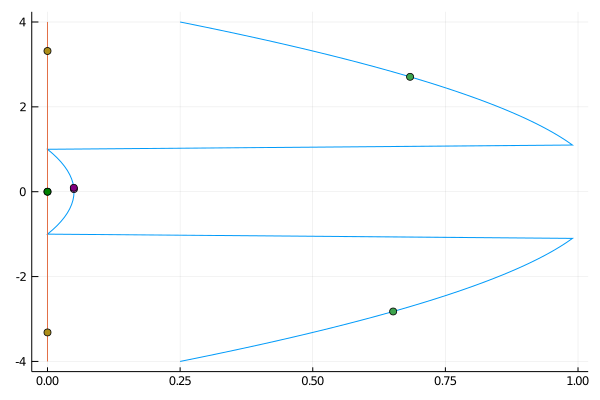

In [28]:
listaYB = [y for y in -4.0:0.1:4.0]
listaXB = zeros(length(listaYB))
plot(listaX, listaY, label = "")
plot!(listaXB, listaYB, label = "")
scatter!([cerosXAa,cerosXAb],[cerosYAa, cerosYAb], label = "")
scatter!([cerosXBa,cerosXBb],[cerosYBa, cerosYBb], label = "")
scatter!([ceros3XAa,ceros3XAb],[ceros3YAa, ceros3YAb], label = "", color  = "purple")
scatter!([ceros3XBa,ceros3XBb],[ceros3YBa, ceros3YBb], label = "", color = "green")

### ⭐ Siguiente iteración.

In [ ]:
find_

In [1]:
?find_zeros

search:

Couldn't find find_zeros
Perhaps you meant count_zeros


No documentation found.

Binding `find_zeros` does not exist.


In [29]:
MapeoA4X(y) = MapeoAX(MapeoAX(MapeoAX(MapeoAX(y))))
MapeoA4Y(y) = MapeoAY(MapeoAY(MapeoAY(MapeoAY(y))))

MapeoA4Y (generic function with 1 method)

In [30]:
ceros4YAa = find_zeros(MapeoA4X,-8.0,8.0)
ceros4YAb = find_zeros(MapeoA4Y,-8.0,8.0)

1-element Array{Float64,1}:
 0.12275938957581756

In [31]:
ceros4XAa = [x_puntoF(ceros4YAa[i],a) for i in 1:length(ceros4YAa)]
ceros4XAb = [x_puntoF(ceros4YAb[i],a) for i in 1:length(ceros4YAb)]

1-element Array{Float64,1}:
 0.04924650661354864

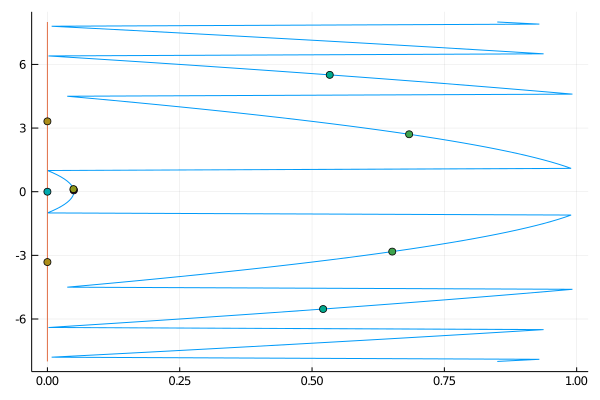

In [32]:
listaYB = [y for y in -8.0:0.1:8.0]
listaXB = zeros(length(listaYB))
listaY = [y for y in -8.0:0.1:8.0]
listaX = [mod((0.1/2)*(1-y^2),1) for y in listaY]
plot(listaX, listaY, label = "")
plot!(listaXB, listaYB, label = "")
scatter!([cerosXAa,cerosXAb],[cerosYAa, cerosYAb], label = "")
scatter!([cerosXBa,cerosXBb],[cerosYBa, cerosYBb], label = "")
scatter!([ceros3XAa,ceros3XAb],[ceros3YAa, ceros3YAb], label = "", color  = "purple")
scatter!([ceros4XAa,ceros4XAb],[ceros4YAa, ceros4YAb], label = "")

Con la segunda condicion $x=0.0$

In [33]:
MapeoB4X(y) = MapeoBX(MapeoBX(MapeoBX(MapeoBX(y))))
MapeoB4Y(y) = MapeoBY(MapeoBY(MapeoBY(MapeoBY(y))))

MapeoB4Y (generic function with 1 method)

In [34]:
ceros4YBa = find_zeros(MapeoB4X,-8.0,8.0)
ceros4YBb = find_zeros(MapeoB4Y,-8.0,8.0)

1-element Array{Float64,1}:
 0.0

In [35]:
ceros4XBa = zeros(length(ceros4YBa))
ceros4XBb = zeros(length(ceros4YBb))

1-element Array{Float64,1}:
 0.0

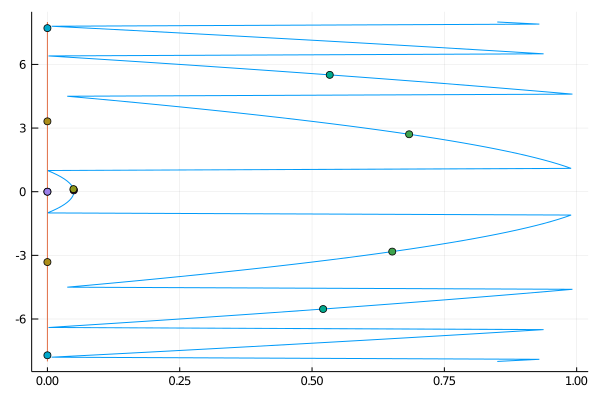

In [36]:
#listaYB = [y for y in -8.0:0.1:8.0]
#listaXB = zeros(length(listaYB))
#listaY = [y for y in -8.0:0.1:8.0]
#listaX = [mod((0.1/2)*(1-y^2),1) for y in listaY]
plot(listaX, listaY, label = "")
plot!(listaXB, listaYB, label = "")
scatter!([cerosXAa,cerosXAb],[cerosYAa, cerosYAb], label = "")
scatter!([cerosXBa,cerosXBb],[cerosYBa, cerosYBb], label = "")
scatter!([ceros3XAa,ceros3XAb],[ceros3YAa, ceros3YAb], label = "", color  = "purple")
scatter!([ceros4XAa,ceros4XAb],[ceros4YAa, ceros4YAb], label = "")
scatter!([ceros4XBa,ceros4XBb],[ceros4YBa, ceros4YBb], label = "")

### ⭐ Siguiente iteración.

In [37]:
MapeoA5X(y) = MapeoAX(MapeoAX(MapeoAX(MapeoAX(MapeoAX(y)))))
MapeoA5Y(y) = MapeoAY(MapeoAY(MapeoAY(MapeoAY(MapeoAY(y)))))
ceros5YAa = find_zeros(MapeoA5X,-8.0,8.0)
ceros5YAb = find_zeros(MapeoA5Y,-8.0,8.0)
ceros5XAa = [x_puntoF(ceros5YAa[i],a) for i in 1:length(ceros5YAa)]
ceros5XAb = [x_puntoF(ceros5YAb[i],a) for i in 1:length(ceros5YAb)]

1-element Array{Float64,1}:
 0.04883014366196311

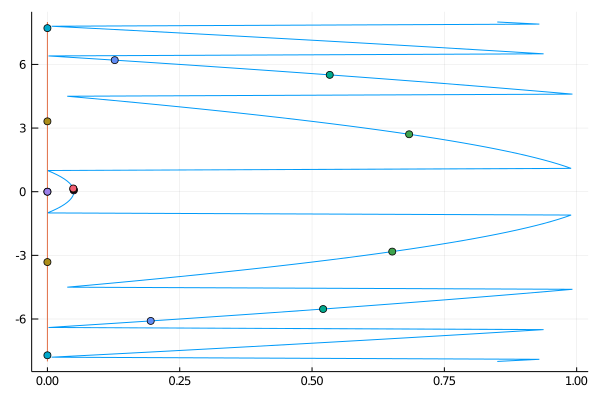

In [38]:
plot(listaX, listaY, label = "")
plot!(listaXB, listaYB, label = "")
scatter!([cerosXAa,cerosXAb],[cerosYAa, cerosYAb], label = "")
scatter!([cerosXBa,cerosXBb],[cerosYBa, cerosYBb], label = "")
scatter!([ceros3XAa,ceros3XAb],[ceros3YAa, ceros3YAb], label = "", color  = "purple")
scatter!([ceros4XAa,ceros4XAb],[ceros4YAa, ceros4YAb], label = "")
scatter!([ceros4XBa,ceros4XBb],[ceros4YBa, ceros4YBb], label = "")
scatter!([ceros5XAa,ceros5XAb],[ceros5YAa, ceros5YAb], label = "")

Con el siguente conjunto invariante $x=0$

In [39]:
MapeoB5X(y) = MapeoBX(MapeoBX(MapeoBX(MapeoBX(MapeoBX(y)))))
MapeoB5Y(y) = MapeoBY(MapeoBY(MapeoBY(MapeoBY(MapeoBY(y)))))
ceros5YBa = find_zeros(MapeoB5X,-8.0,8.0)
ceros5YBb = find_zeros(MapeoB5Y,-8.0,8.0)
ceros5XBa = zeros(length(ceros5YBa))
ceros5XBb = zeros(length(ceros5YBb))

1-element Array{Float64,1}:
 0.0

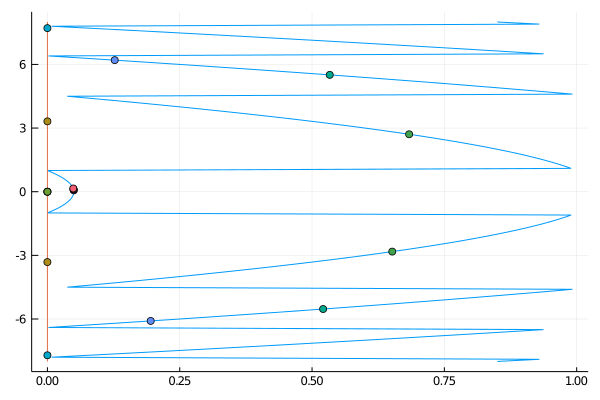

In [40]:
plot(listaX, listaY, label = "")
plot!(listaXB, listaYB, label = "")
scatter!([cerosXAa,cerosXAb],[cerosYAa, cerosYAb], label = "")
scatter!([cerosXBa,cerosXBb],[cerosYBa, cerosYBb], label = "")
scatter!([ceros3XAa,ceros3XAb],[ceros3YAa, ceros3YAb], label = "", color  = "purple")
scatter!([ceros4XAa,ceros4XAb],[ceros4YAa, ceros4YAb], label = "")
scatter!([ceros4XBa,ceros4XBb],[ceros4YBa, ceros4YBb], label = "")
scatter!([ceros5XAa,ceros5XAb],[ceros5YAa, ceros5YAb], label = "")
scatter!([ceros5XBa,ceros5XBb],[ceros5YBa, ceros5YBb], label = "")

### ⭐ Periodo 10

In [41]:
MapeoA10X(y) = MapeoA5X(MapeoA5X(y))
MapeoA10Y(y) = MapeoA5Y(MapeoA5Y(y))
ceros10YAa = find_zeros(MapeoA10X,-8.0,8.0)
ceros10YAb = find_zeros(MapeoA10Y,-8.0,8.0)
ceros10XAa = [x_puntoF(ceros10YAa[i],a) for i in 1:length(ceros10YAa)]
ceros10XAb = [x_puntoF(ceros10YAb[i],a) for i in 1:length(ceros10YAb)]

1-element Array{Float64,1}:
 0.045544751779358544

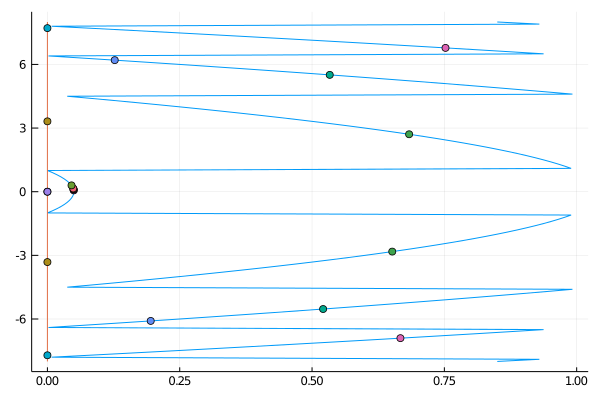

In [42]:
plot(listaX, listaY, label = "")
plot!(listaXB, listaYB, label = "")
scatter!([cerosXAa,cerosXAb],[cerosYAa, cerosYAb], label = "")
scatter!([cerosXBa,cerosXBb],[cerosYBa, cerosYBb], label = "")
scatter!([ceros3XAa,ceros3XAb],[ceros3YAa, ceros3YAb], label = "", color  = "purple")
scatter!([ceros4XAa,ceros4XAb],[ceros4YAa, ceros4YAb], label = "")
scatter!([ceros4XBa,ceros4XBb],[ceros4YBa, ceros4YBb], label = "")
scatter!([ceros5XAa,ceros5XAb],[ceros5YAa, ceros5YAb], label = "")
scatter!([ceros10XAa,ceros10XAb],[ceros10YAa, ceros10YAb], label = "")

### ⭐ Periodo 15

In [43]:
MapeoA15X(y) = MapeoA5X(MapeoA5X(MapeoA5X(y)))
MapeoA15Y(y) = MapeoA5X(MapeoA5Y(MapeoA5Y(y)))
ceros15YAa = find_zeros(MapeoA15X,-6.0,6.0)
ceros15YAb = find_zeros(MapeoA15Y,-6.0,6.0)
ceros15XAa = [x_puntoF(ceros15YAa[i],a) for i in 1:length(ceros15YAa)]
ceros15XAb = [x_puntoF(ceros15YAb[i],a) for i in 1:length(ceros15YAb)]

1-element Array{Float64,1}:
 0.4822916298235296

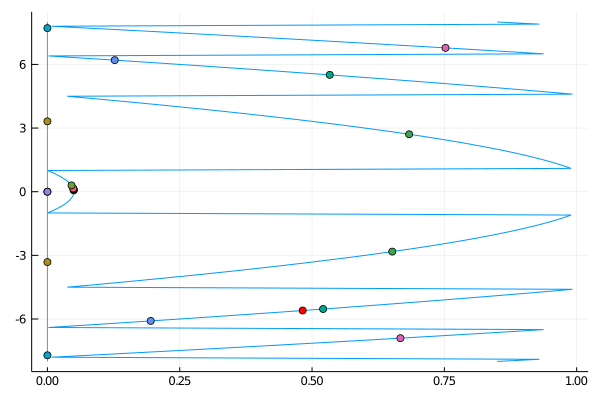

In [44]:
plot(listaX, listaY, label = "")
plot!(listaXB, listaYB, label = "")
scatter!([cerosXAa,cerosXAb],[cerosYAa, cerosYAb], label = "")
scatter!([cerosXBa,cerosXBb],[cerosYBa, cerosYBb], label = "")
scatter!([ceros3XAa,ceros3XAb],[ceros3YAa, ceros3YAb], label = "", color  = "purple")
scatter!([ceros4XAa,ceros4XAb],[ceros4YAa, ceros4YAb], label = "")
scatter!([ceros4XBa,ceros4XBb],[ceros4YBa, ceros4YBb], label = "")
scatter!([ceros5XAa,ceros5XAb],[ceros5YAa, ceros5YAb], label = "")
scatter!([ceros10XAa,ceros10XAb],[ceros10YAa, ceros10YAb], label = "")
scatter!([ceros15XAa,ceros15XAb],[ceros15YAa, ceros15YAb], label = "", color ="red")

### ⭐ Periodo 20

In [45]:
MapeoA20X(y) = MapeoA10X(MapeoA10X(y))
MapeoA20Y(y) = MapeoA10Y(MapeoA10Y(y))
@time ceros20YAa = find_zeros(MapeoA20X,-5.0,5.0)
@time ceros20YAb = find_zeros(MapeoA20Y,-5.0,5.0)

  0.115808 seconds (97.28 k allocations: 4.264 MiB)
  0.117508 seconds (245.28 k allocations: 6.566 MiB)


1-element Array{Float64,1}:
 0.547362789164173

In [46]:
ceros20XAa = [x_puntoF(ceros20YAa[i],a) for i in 1:length(ceros20YAa)]
ceros20XAb = [x_puntoF(ceros20YAb[i],a) for i in 1:length(ceros20YAb)]

1-element Array{Float64,1}:
 0.035019698851920855

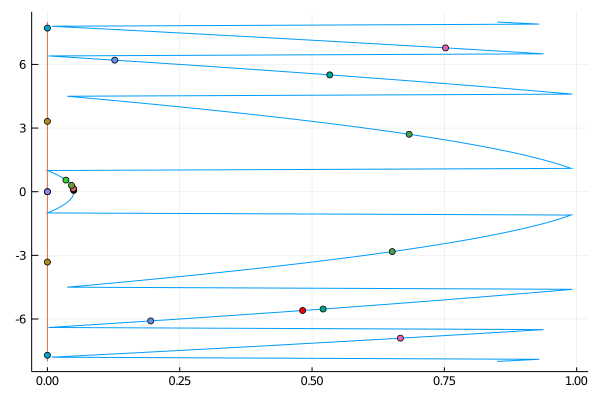

In [48]:
plot(listaX, listaY, label = "")
plot!(listaXB, listaYB, label = "")
scatter!([cerosXAa,cerosXAb],[cerosYAa, cerosYAb], label = "")
scatter!([cerosXBa,cerosXBb],[cerosYBa, cerosYBb], label = "")
scatter!([ceros3XAa,ceros3XAb],[ceros3YAa, ceros3YAb], label = "", color  = "purple")
scatter!([ceros4XAa,ceros4XAb],[ceros4YAa, ceros4YAb], label = "")
scatter!([ceros4XBa,ceros4XBb],[ceros4YBa, ceros4YBb], label = "")
scatter!([ceros5XAa,ceros5XAb],[ceros5YAa, ceros5YAb], label = "")
scatter!([ceros10XAa,ceros10XAb],[ceros10YAa, ceros10YAb], label = "")
scatter!([ceros15XAa,ceros15XAb],[ceros15YAa, ceros15YAb], label = "", color ="red")
scatter!([ceros20XAa,ceros20XAb],[ceros20YAa, ceros20YAb], label = "", color ="limegreen", fmt = :png)

# Automatizar!!

In [ ]:
ceros10XAa = [x_puntoF(ceros10YAa[i],a) for i in 1:length(ceros10YAa)]
ceros10XAb = [x_puntoF(ceros10YAb[i],a) for i in 1:length(ceros10YAb)]